# Exercise 2(b)


In [ ]:
# importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from random import gauss as ga
from math import log, exp, sqrt
%matplotlib inline

In [ ]:
#SDE model parameters
σ=1         #expected votality
S_0 = 2    #initial stock price
T = 1      #Period
N = 300
dt = 1.0/N  #small increment of time
t = np.arange(dt,1+dt,dt) #create an array of time step



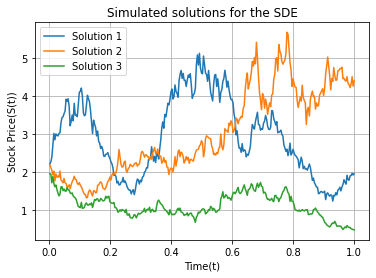

In [ ]:
for i in range(3): # create a plot for 3 solutions
    
    # Brownian Motion
    np.random.seed(i)
    dW = np.sqrt(dt) * np.random.randn(N)
    W  = np.cumsum(dW)
    
    # Then compute the solutions
    S = S_0 * np.exp((- 0.5 * σ**2) * t + σ * W)
    
    # plotting the simulations to the solutions
    plt.title('Simulated solutions for the SDE')
    plt.xlabel('Time(t)')
    plt.ylabel('Stock Price(S(t))')
    plt.plot(t, S, label = "Solution " + str(i+1))
    plt.grid()
    plt.legend();

# Exercise 3

**Calculating the put price using BS equation**

In [ ]:
#defining the function
def put_price(S_0, K, T, r,σ):   
    '''
    Valuation of European put option in Black Scholes model
    using the analytic formula.
    
    Parameters
    ==========
    S_0 : float        initial stock/index level
    K : float         strike price
    T : float         maturity date (in year fractions)
    r : float         constant risk-free short rate
    σ : float     volatility factor in diffusion term
    
    Returns
    =======
    value : float     present value of the European put option
    '''
#calculating the put_price for Black Scholes
    S_0 = float(S_0)
    d1 = (log(S_0 / K) + (r + 0.5 * σ ** 2) * T) / (σ * sqrt(T))
    d2 = d1-(σ* sqrt(T))
    value = (K*np.exp(-r*T)-S_0+S_0 * stats.norm.cdf(d1, 0.0, 1.0)
            - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    

    return value

In [ ]:
#initializing the  parameters
S_0 = 50                  #initial stock price
T = 3                     #Period
r = 0.02                  #rate
σ = 0.20                  #votality 
K = 55.00                 #Strike price   

#print the put price
print(put_price(S_0, K, T, r,σ))



7.933531423129754


**Monte Carlo method to price a put option**

In [ ]:
#importing relevant libraries
import math
from random import gauss                                                                   
from math import exp, sqrt                                                                 
#defining a function that generates stock prices
def stock_price(S_0,sigma,r,T):                                           
     
     #return stock prices
    return S_0 * exp((r - 0.5 * sigma**2) * T + sigma * sqrt(T) * gauss(0,1.0))  

 #defining a payoff function   
def put_option_payoff(S_T,K):                                                              
    return max(0.0,K-S_T)

S_0 = 50       # Initial stock price
sigma = 0.20   # volatility
r = 0.02       # risk free rate
T = 3          # Time in years
K = 55.        # Strike price
Simulations = 1000000  #number of simulations
put_payoffs = []                     # Creating an empty list for put option payoffs
discount_factor = math.exp(-r * T)     

#create a for loop for the simulations
for i in range(Simulations):  
     #then compute the stock prices                                                  
    S_T = stock_price(S_0,sigma,r,T)                       
    put_payoffs.append(put_option_payoff(S_T, K))                                              
#then calculate the prices for the put option
put_option_price = discount_factor * (sum(put_payoffs) / float(Simulations)) 
#print the price generated by the simulations   
print('Simulated option price using monte carlo:',put_option_price)                                                


Simulated option price using monte carlo: 7.934799709509337


# Exercise 4(b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

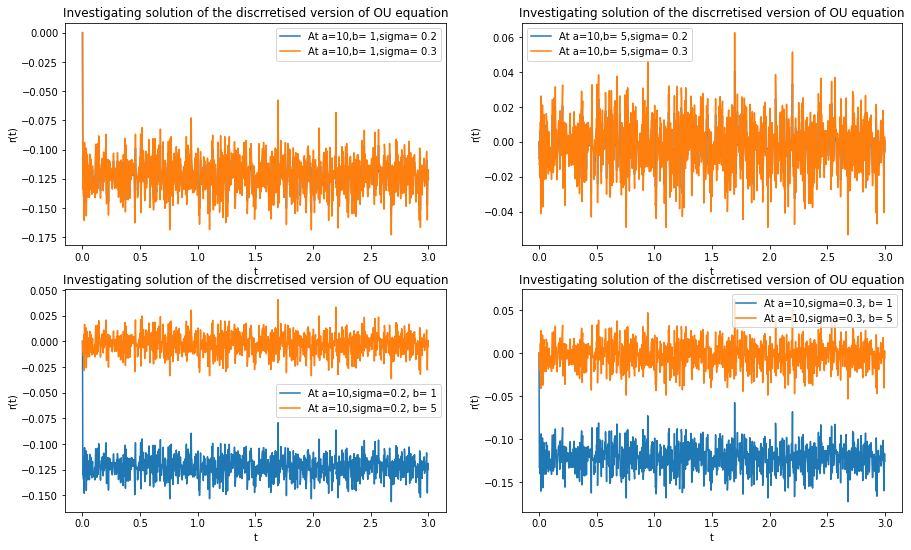

In [ ]:
#Declaring parameters
a = 10     
b = [1,5]
sigma = [0.20,0.3]       
                                                                          
N = 1000  #number of simulations                                                 
t0 = 0    #time                                                                  
t_f = 3   #array of step time                                                    

t = np.linspace(t0, t_f, N)                                                      
dt = np.mean(np.diff(t))       #time step

# Here create  Brownian Motion
dW = np.random.normal(loc=0.0, scale=1.0, size=N)*np.sqrt(dt) 


#Then Initialize the SDE
r_t = np.zeros(N)                                                                  
r_0 = np.random.normal(loc=0.0, scale=1.0)                                         

#size of our plots
plt.figure(figsize=[15,9]) 


#define the  drift term
for j in range(len(sigma)):
  drift = lambda r_t,t:b[0]*(a-r_t)

#diffusion term
  diffusion = lambda r_t,t:sigma[j]

  #plotting the solutions
  for i in range(1, N):
    r_t[i]=r_0 + drift(r_t[i-1], i*dt)*dt + diffusion(r_t[i-1], i*dt)*dW[i]
  plt.subplot(2,2,1)
  plt.plot(t,r_t, label="At a=10,b= 1,sigma= "+str(round((0.2+j*0.1),1)))
  plt.title('Solution of the OU equation') 
  plt.ylabel('r(t)')                                                             
  plt.xlabel('t')                                                               
  plt.legend()


  #At a=10, b=5, sigma[0.2,0.3]
for j in range(len(sigma)):
  drift = lambda r_t,t:b[1]*(a-r_t)

#defining diffusion term
  diffusion = lambda r_t,t:sigma[j]


#plotting the solutions
  for i in range(1, N):
    r_t[i]=r_0 + drift(r_t[i-1], i*dt)*dt + diffusion(r_t[i-1], i*dt)*dW[i]
  plt.subplot(2,2,2)
  plt.plot(t,r_t, label="At a=10,b= 5,sigma= "+str(round((0.2+j*0.1),1))) 
  plt.title('Solution of the OU equation')  
  plt.ylabel('r(t)')                                                              
  plt.xlabel('t')                                                                                                    
  plt.legend()


#At a=10,sigma=0.2,  b=[1,5]
for j in range(len(b)):
  drift = lambda r_t,t:b[j]*(a-r_t)

#defining diffusion term
  diffusion = lambda r_t,t:sigma[0]


#plotting the solution
  for i in range(1, N):
    r_t[i]=r_0 + drift(r_t[i-1], i*dt)*dt + diffusion(r_t[i-1], i*dt)*dW[i]
  plt.subplot(2,2,3)
  plt.plot(t,r_t, label="At a=10,sigma=0.2, b= "+str(round((1+j*4),1)))
  plt.title('Solution of the OU equation')     
  plt.ylabel('r(t)')                                                                 
  plt.xlabel('t')                                                                                                              
  plt.legend()

#At a=10,σ=0.3,  b=[1,5]
for j in range(len(b)):
  drift = lambda r_t,t:b[j]*(a-r_t)

#defining diffusion term
  diffusion = lambda r_t,t:sigma[1]



  #plotting the solution
  for i in range(1, N):
    r_t[i]=r_0 + drift(r_t[i-1], i*dt)*dt + diffusion(r_t[i-1], i*dt)*dW[i]
  plt.subplot(2, 2, 4)
  plt.plot(t,r_t, label="At a=10,sigma=0.3, b= "+str(round((1+j*4),1)))
  plt.title('Solution of the OU equation')  
  plt.ylabel('r(t)')                                                              
  plt.xlabel('t')                                                                                                                  
  plt.legend()
  np.random.seed(1)

## References 

1.Lecture notes

2.https://medium.com/swlh/option-pricing-using-monte-carlo-simulations-41d9e4ad95f6


3.https://www.goddardconsulting.ca/option-pricing-monte-carlo-index.html

4.https://predictivehacks.com/pricing-of-european-options-with-monte-carlo/

5.https://hautahi.com/sde_simulation